In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
df=pd.read_csv('titanic_train.csv ')

In [6]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

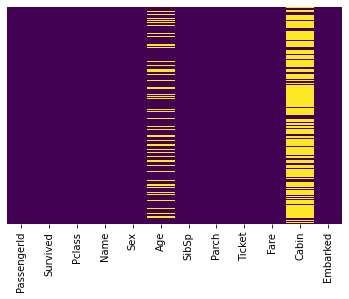

In [10]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # visually seen the null values

<AxesSubplot:xlabel='Survived', ylabel='count'>

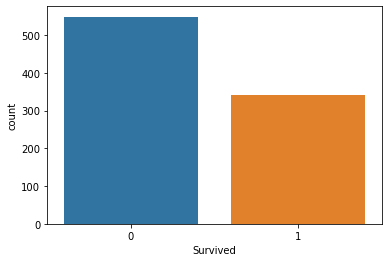

In [17]:
sb.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

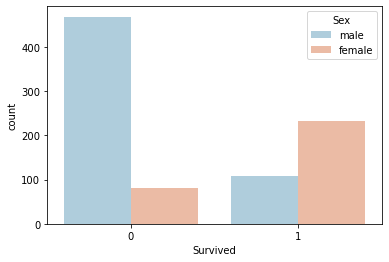

In [20]:
sb.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

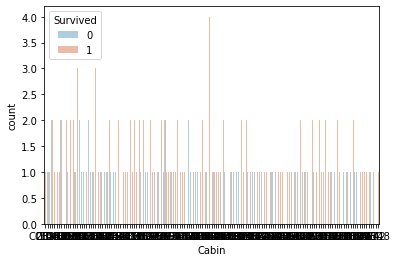

In [25]:
sb.countplot(x='Cabin',hue='Survived',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

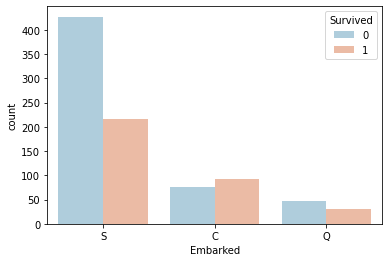

In [26]:
sb.countplot(x='Embarked',hue='Survived',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

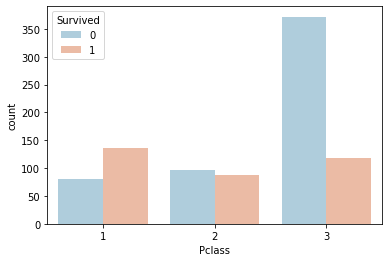

In [27]:
sb.countplot(x='Pclass',hue='Survived',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Age'>

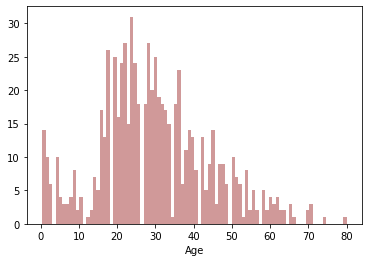

In [34]:
sb.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=90)

In [36]:
sb.distplot(df[df['Survived']==1].Age.dropna(),color='red',ax=axes[0],label='Survived',kde=False,bins=90)

NameError: name 'axes' is not defined

<AxesSubplot:xlabel='SibSp', ylabel='count'>

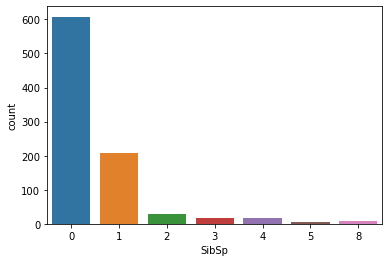

In [37]:
sb.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

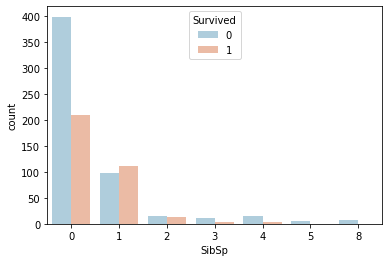

In [39]:
sb.countplot(x='SibSp',hue='Survived',data=df,palette='RdBu_r')

<AxesSubplot:>

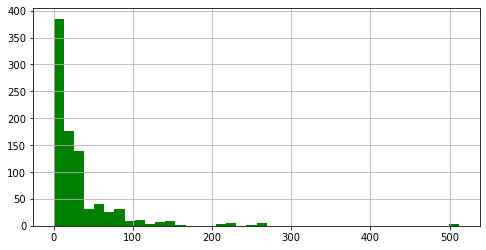

In [43]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

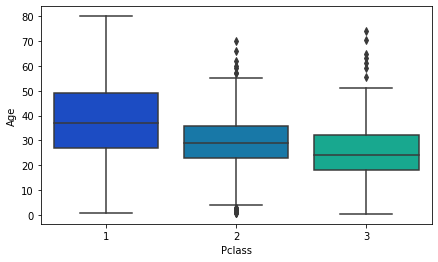

In [49]:
plt.figure(figsize=(7,4))
sb.boxplot(x='Pclass',y='Age',data=df,palette='winter')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

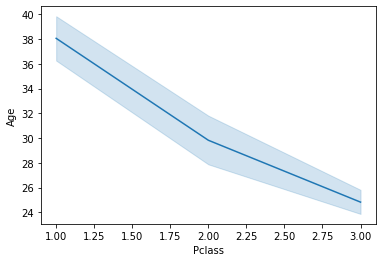

In [87]:
sb.lineplot(x='Pclass',y='Age',data=df,palette='winter')

In [ ]:
#finding the median of all class and filling the null values in age by all class

In [51]:
df['Age'].median()

28.0

In [59]:
df[df.Pclass==1].median()

C:\Users\mukesh\AppData\Local\Temp/ipykernel_55000/1257026216.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.Pclass==1].median()


PassengerId    472.0000
Survived         1.0000
Pclass           1.0000
Age             37.0000
SibSp            0.0000
Parch            0.0000
Fare            60.2875
dtype: float64

In [60]:
df[df.Pclass==2].median()

C:\Users\mukesh\AppData\Local\Temp/ipykernel_55000/3221151430.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.Pclass==2].median()


PassengerId    435.50
Survived         0.00
Pclass           2.00
Age             29.00
SibSp            0.00
Parch            0.00
Fare            14.25
dtype: float64

In [61]:
df[df.Pclass==3].median()

C:\Users\mukesh\AppData\Local\Temp/ipykernel_55000/258898382.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.Pclass==3].median()


PassengerId    432.00
Survived         0.00
Pclass           3.00
Age             24.00
SibSp            0.00
Parch            0.00
Fare             8.05
dtype: float64

In [62]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [63]:
df['Age'] = df[['Age','Pclass']].apply(fill_age,axis=1)

In [64]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
def fill_age(cols):
    Cabin = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Cabin):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Cabin

In [66]:
df['Cabin'] = df[['Cabin','Pclass']].apply(fill_age,axis=1)

In [67]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

<AxesSubplot:>

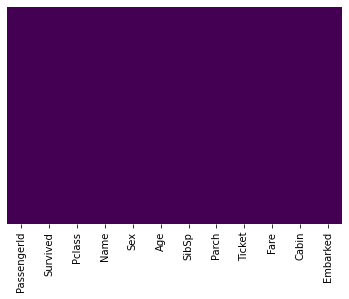

In [68]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #here no null values are shown

In [84]:
df.drop(columns=['Cabin','Embarked'],inplace=True)
df.drop(columns =['PassengerId','Name','Ticket'],inplace=True)

In [85]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [86]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,24.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000
